In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
data_path = r'C:\Users\nandi\OneDrive\Desktop\Minor Project\yawn dataset'
categories = ['new_yawn', 'new_no_yawn']
data = []


In [6]:
for category in categories:
    path = os.path.join(data_path, category)
    label = categories.index(category)
    for img in os.listdir(path):
        data.append([os.path.join(path, img), label])

In [7]:
df = pd.DataFrame(data, columns=['Image_Path', 'Label'])
print(df.head())

                                          Image_Path  Label
0  C:\Users\nandi\OneDrive\Desktop\Minor Project\...      0
1  C:\Users\nandi\OneDrive\Desktop\Minor Project\...      0
2  C:\Users\nandi\OneDrive\Desktop\Minor Project\...      0
3  C:\Users\nandi\OneDrive\Desktop\Minor Project\...      0
4  C:\Users\nandi\OneDrive\Desktop\Minor Project\...      0


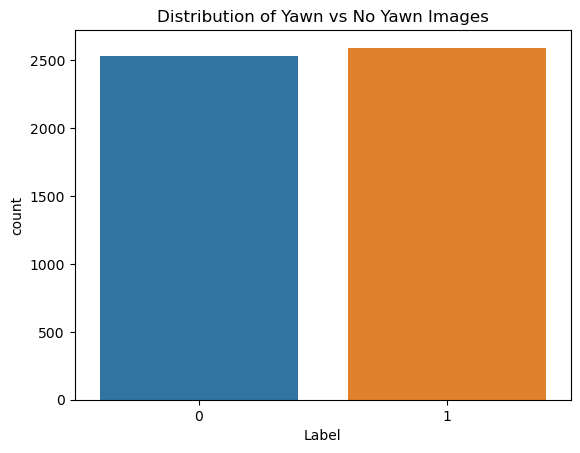

In [8]:
sns.countplot(x='Label', data=df)
plt.title("Distribution of Yawn vs No Yawn Images")
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
img_size = (64, 64)  # Resize images to a manageable size

In [11]:
X = []
y = []

In [12]:
for index, row in df.iterrows():
    img = load_img(row['Image_Path'], target_size=img_size, color_mode="rgb")
    img_array = img_to_array(img) / 255.0  # Normalize images
    X.append(img_array)
    y.append(row['Label'])

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

C:\Users\nandi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9885 - loss: 0.0428 - val_accuracy: 0.9756 - val_loss: 0.0882
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9883 - loss: 0.0424 - val_accuracy: 0.9531 - val_loss: 0.1392
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9843 - loss: 0.0550 - val_accuracy: 0.9756 - val_loss: 0.0986
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9913 - loss: 0.0306 - val_accuracy: 0.9795 - val_loss: 0.0845
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9924 - loss: 0.0279 - val_accuracy: 0.9746 - val_loss: 0.1038
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9939 - loss: 0.0267 - val_accuracy: 0.9785 - val_loss: 0.0913
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9922 - loss: 0.0217 - val_accuracy: 0.9678 - val_loss: 0.1187
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accu

Text(0.5, 1.0, 'Training and Validation Accuracy')

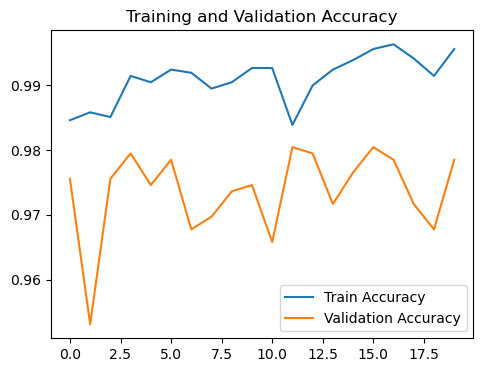

In [19]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

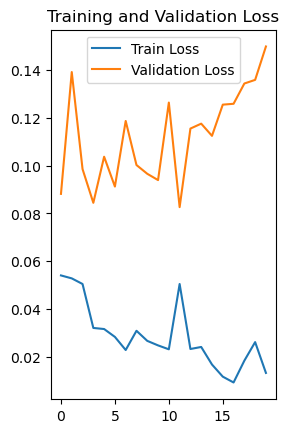

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9710 - loss: 0.1565
Test Accuracy: 97.85%


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


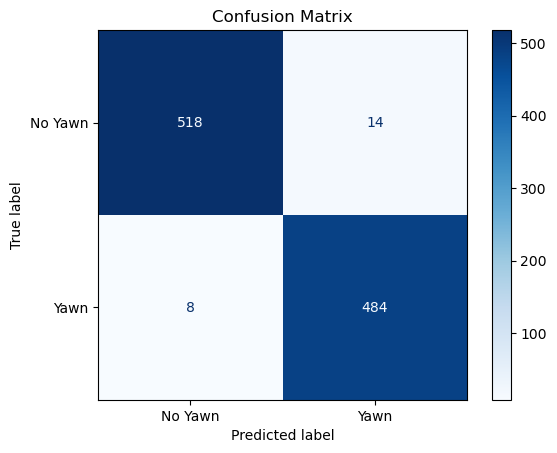

True Negatives: 518, False Positives: 14, False Negatives: 8, True Positives: 484


In [24]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Thresholding for binary classification

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Yawn', 'Yawn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Extract True Positives, False Positives, False Negatives, True Negatives
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [26]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.97
Recall: 0.98
F1 Score: 0.98
